.. meta::
   :description: A guide which introduces the most important steps to get started with pymoo, an open-source multi-objective optimization framework in Python.

.. meta::
   :keywords: Multi-objective Optimization, Python, Evolutionary Computation, Optimization Test Problem, Hypervolume

In [5]:
%%capture
%run part_2.ipynb

# Part III: Decision Making

Having now obtained a set of non-dominated solutions, one can ask how a decision-maker can nail down the set to only a few or even a single solution. This decision-making process for multi-objective problems is also known as Multi-Criteria Decision Making (MCDM). You should know that the main focus of *pymoo* lies on the optimization, not on the MCDM part. However, the framework offers some rudimentary tools to find an appropriate solution.  

The Pareto-optimal solutions obtained from the optimization procedure are given by:

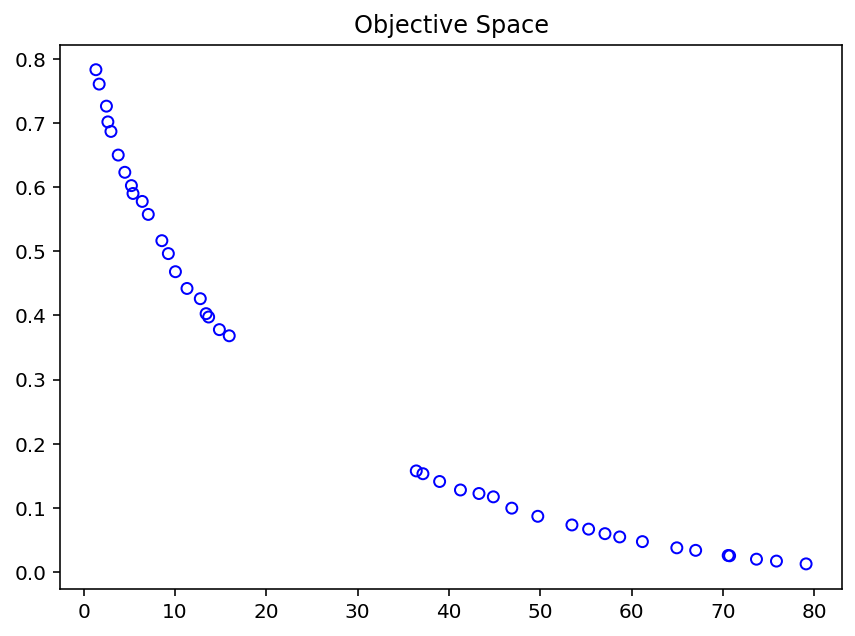

In [6]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Before we start using any kind of technique, we should note that the objectives do have a different scale. Which has never been a problem for single-objective optimization because not more than one dimension existed, now becomes fundamentally important to consider.  

In [7]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.3302309559901055, 79.10681498794352]
Scale f2: [0.012785651008357626, 0.7828276592614037]


As one can observe the lower and upper bounds of the objectives $f_1$ and $f_2$ are very different and such a normalization is required.

A common way is normalizing using the so-called ideal and nadir point. For the decision-making purpose here and the sake of generalization we assume the ideal and nadir points (also referred to as boundary points) as well as the Pareto-front is not know.
Thus the points can be approximated by:

In [8]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

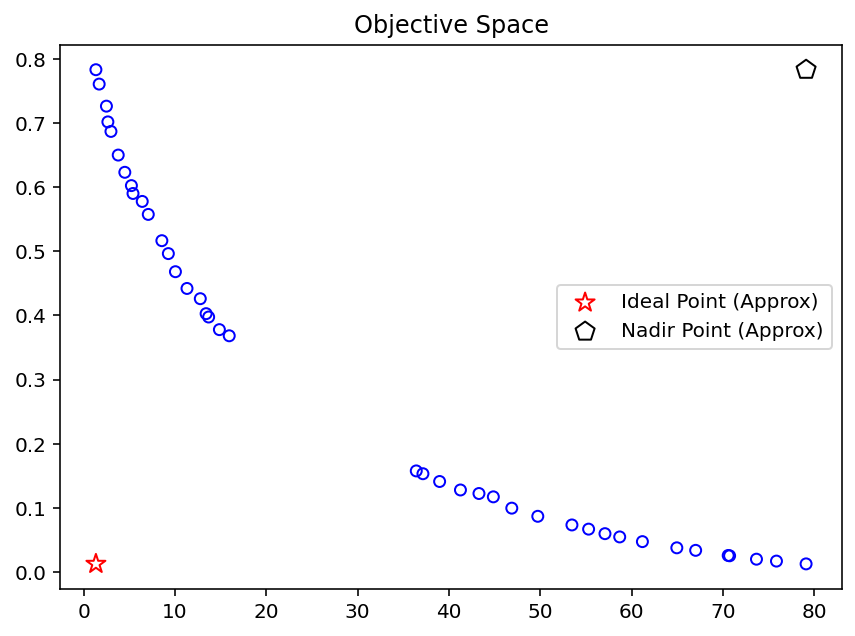

In [9]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Normalizing the obtained objective values regarding the boundary points is relatively simple by:

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


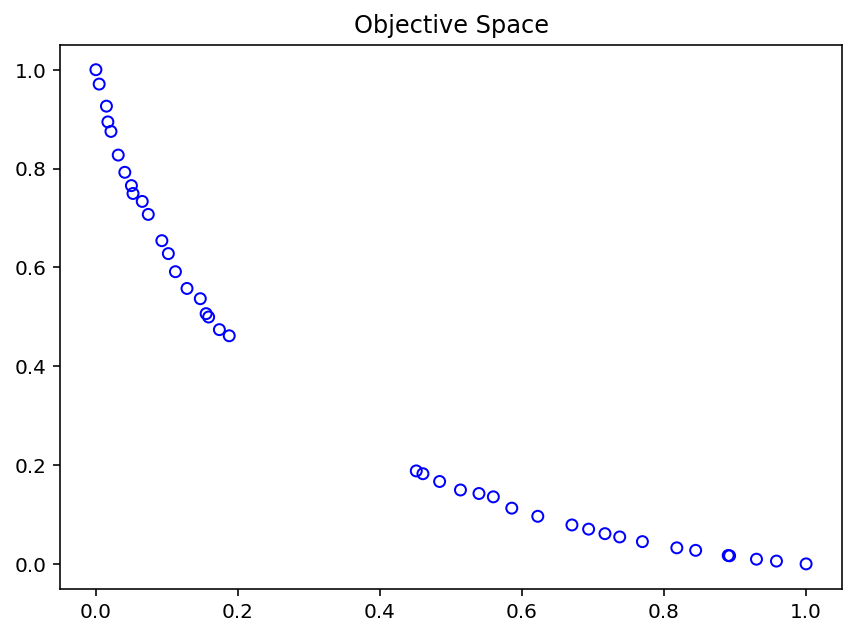

In [10]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

### Compromise Programming

Without going into too much detail in this getting started guide, one way for decision making is the usage of decompostion functions. They require the definition of weights which reflect the users wishes. The weights are given by a vector with only positive float numbers summing up to one and a length equal to the number of objectives.

Here for a bi-objective problem let us assume the first objective is less a bit less important than the second objective by setting the weights to

In [18]:
weights = np.array([0.2, 0.8])

Next, we choose the decomposition method called Augmented Scalarization Function (ASF) which is a well-known metric in the multi-objective optimization literature. 

In [19]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

Now let us obtain the best solution regarding the ASF. Because ASF is supposed to be minimized, we choose the minimum ASF values calculated from all solutions. You might be wondering why the weights are not passed directly, but `1/weights`. For ASF, different formulations exist, one where the values are divided and one where they are multiplied. In *pymoo*, we divide, which does not reflect the idea of the user's criteria. Thus, the inverse needs to be applied. No worries if this is too much detail for now; however, decision-making about decomposition techniques is vital.

In [38]:
i = decomp.do(nF, 1/weights).argmin()

After having found a solution ($i$) we can operate on the original scale to represent the results:

Best regarding ASF: Point 
i = 23
F = [44.85588752  0.11726185]


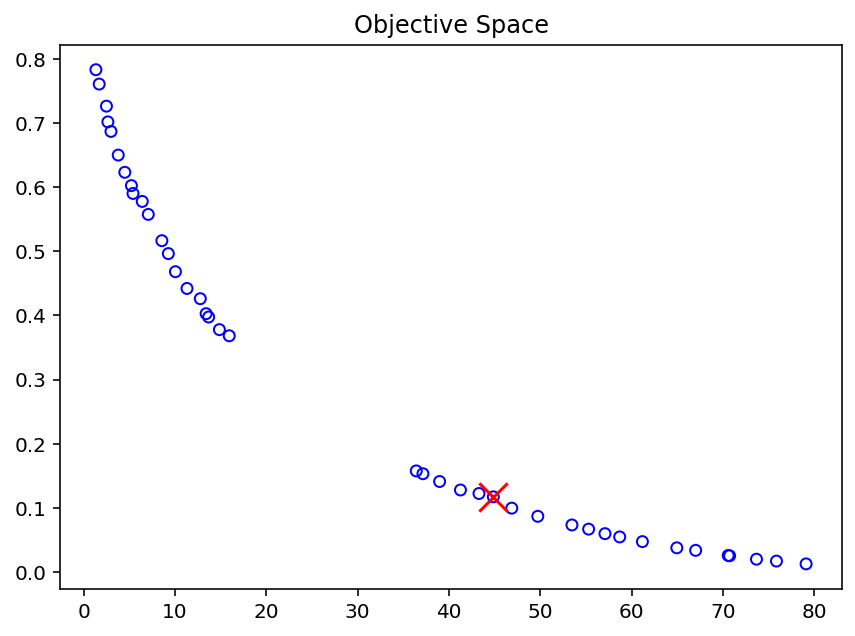

In [39]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

### Pseudo-Weights

A simple way to chose a solution out of a solution set in the context of multi-objective optimization is the pseudo-weight vector approach proposed in <cite data-cite="multi_objective_book"></cite>. Respectively, the pseudo weight $w_i$ for the i-ith objective function can be calculated by:

\begin{equation}
w_i = \frac{(f_i^{max} - f_i {(x)}) \, /\,  (f_i^{max} - f_i^{min})}{\sum_{m=1}^M (f_m^{max} - f_m (x)) \, /\,  (f_m^{max} - f_m^{min})}  
\end{equation}

This equation calculates the normalized distance to the worst solution regarding each objective $i$. Please note that for non-convex Pareto fronts the pseudo weight does not correspond to the result of an optimization using the weighted sum. However, for convex Pareto-fronts the pseudo weights are an indicator of the location in the objective space.

In [40]:
from pymoo.decision_making.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)

Best regarding Pseudo Weights: Point 
i = 16
F = [6.11804441e+01 4.74897935e-02]


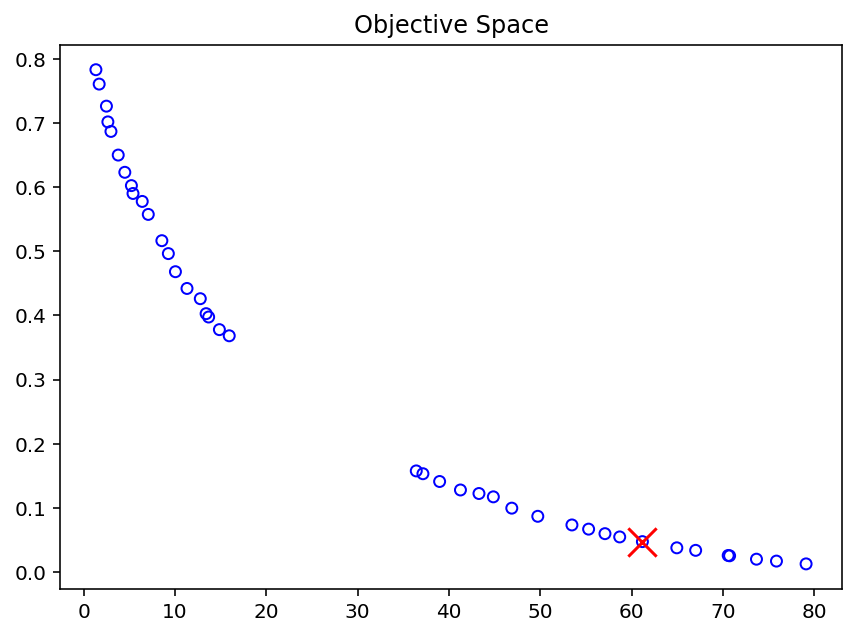

In [41]:
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()